In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import os

root_path = '/content/drive/MyDrive/인지프 프로젝트/'
name = str(input('name='))

def take_photo(filename=name+'.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

name=혁승이


<IPython.core.display.Javascript object>

Saved to 혁승이.jpg


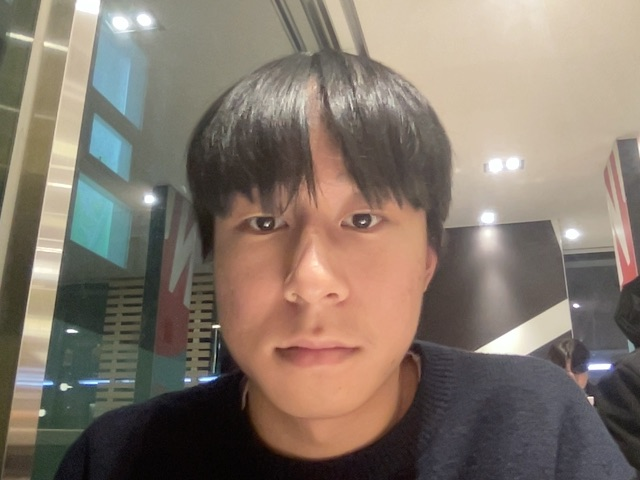

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (1,1)

known_person_list = []
known_person_list.append([fr.load_image_file('/content/drive/Shareddrives/인지프/data/김시환.jpeg')])
known_person_list.append([fr.load_image_file('/content/drive/Shareddrives/인지프/data/신정안.jpeg')])
known_person_list.append([fr.load_image_file('/content/drive/Shareddrives/인지프/data/이혁승.jpeg')])
#known_person_list.append([fr.load_image_file('/content/drive/MyDrive/인지프 프로젝트/face_data/곰2.jpg')])
#known_person_list.append([fr.load_image_file('/content/drive/MyDrive/인지프 프로젝트/face_data/웃는곰.jpg')])

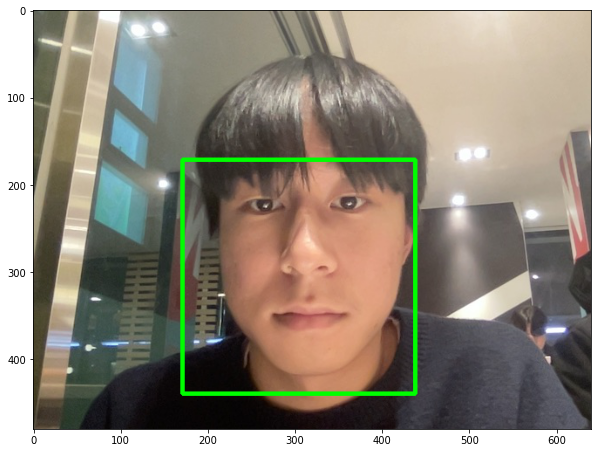

In [ ]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = '/content/' + name + '.jpg'

image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

for (top, right, bottom, left) in face_locations:
  cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)

# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(image)
plt.show()

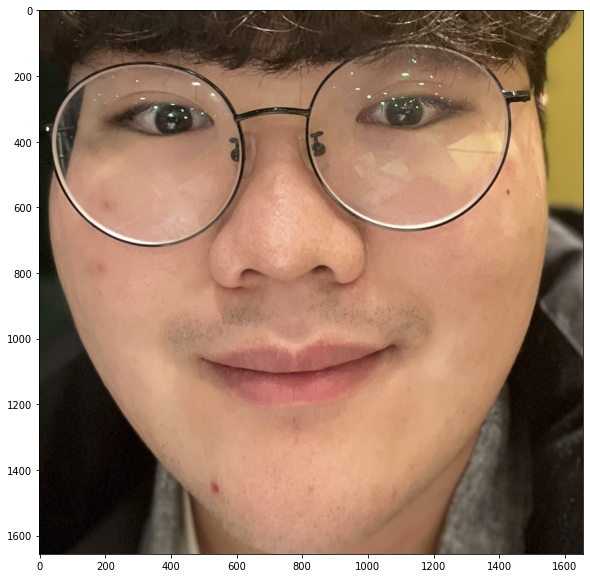

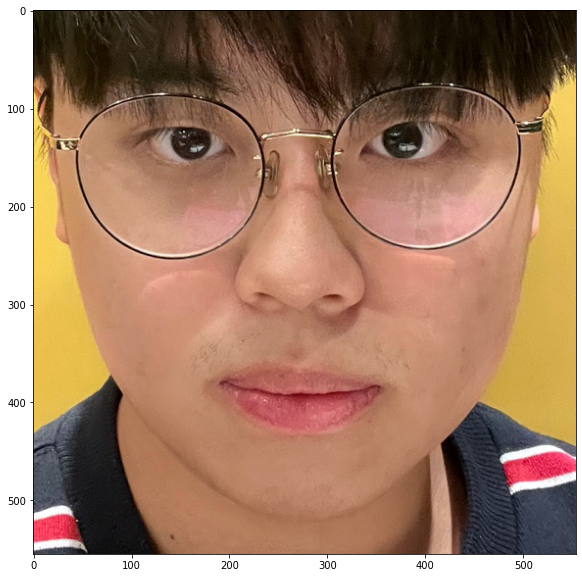

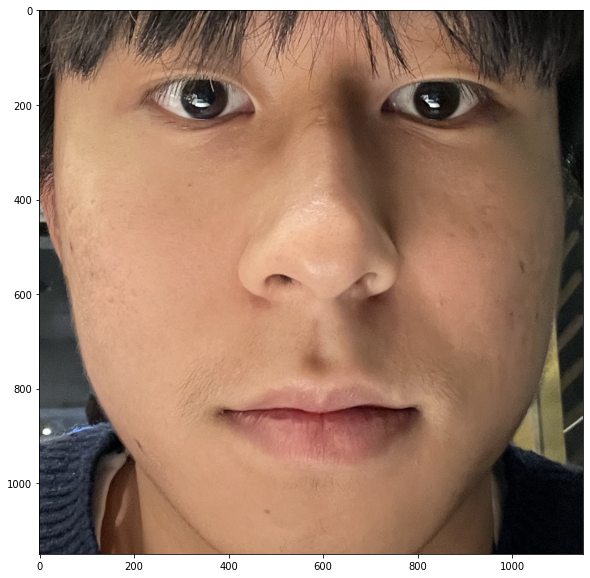

In [ ]:
# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:
  top, right, bottom, left = map(int, fr.face_locations(person[0])[0])
  face_image = person[0][top:bottom, left:right]

  # known_face_list에 잘라낸 face_image를 저장
  known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
  plt.rcParams["figure.figsize"] = (10,10)
  plt.imshow(face)
  plt.show()

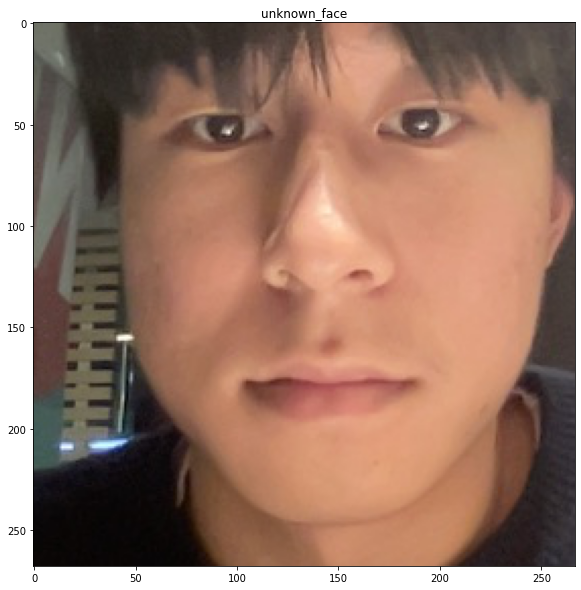

In [ ]:
# 기존리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file('/content/' + name + '.jpg')

#얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

#unknown_face이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

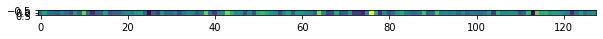

In [ ]:
# unknown_person_face를 인코딩(라이브러리 데이터 구조로 인코딩)
enc_unknown_face = fr.face_encodings(unknown_face)

#화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face)
plt.show()

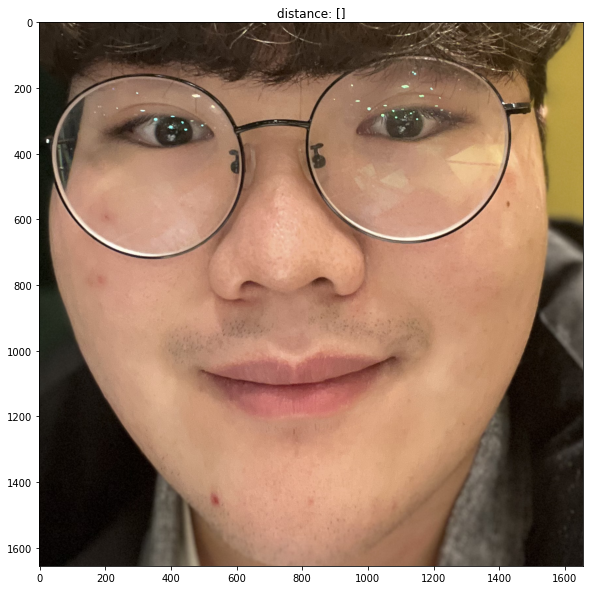

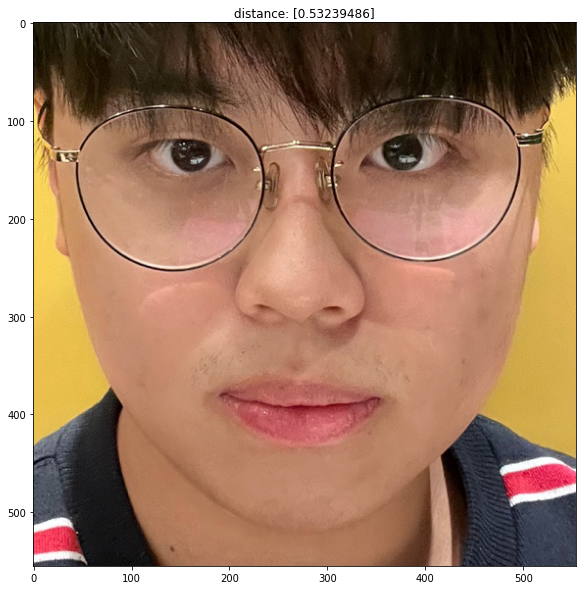

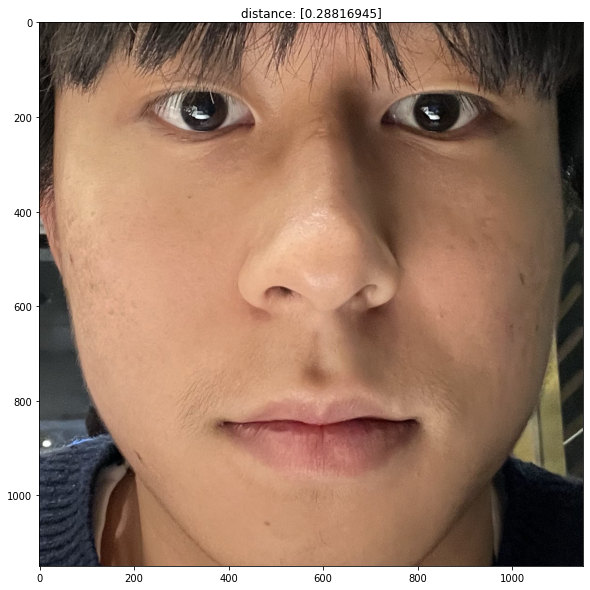

In [ ]:
# 등록된 얼굴 리스트를 비교
for face in known_face_list:

  # 등록된 얼굴을 128-dimensional face 인코딩
  enc_known_face = fr.face_encodings(face)

  # 등록된 얼굴과 새로운 얼굴의 distance를 얻기
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  # distacne 수치를 포함한 얼굴 출력
  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()

In [ ]:
import numpy as np
import cv2
from keras.models import load_model
import dlib
import matplotlib.pyplot as plt

In [ ]:
class face_exp():
    def __init__(self):
        self.model = load_model("/content/drive/Shareddrives/인지프/data/cv/model-3.h5")
       
    def predict(self,filepath):
      """
      filepath의 사진을 불러와 predict를 통해 대상의 감정을 추출함
      각 감정에 대한 확률값을 이중리스트에 담아서 리턴함함 
      """
        emotions = ('분노', '두려움', '행복함', '슬픔', '놀람', '보통') 
        img=cv2.imread(filepath)
        img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img = cv2.resize(img, (48,48))
        face_detector=dlib.get_frontal_face_detector()
        faces=face_detector(img)
        if (len(faces) == 0):
            return "Not Recognized."
        for f in faces:
            crop=img[f.top():f.bottom(),f.left():f.right()]
        
        print('crop shape : {}'.format(crop.shape))
        crop = cv2.resize(crop, (48, 48))
        plt.imshow(crop)
        plt.show()
        output1 = emotions[np.argmax(self.model.predict(crop.reshape((1,48,48,1))), axis=-1)[0]]
        print('face expression output : {}'.format(output1))
        output2 = self.model.predict(crop.reshape((1,48,48,1)))
        print('Percentage Each expression : {}'.format(output2*100))
        output2 = output2.tolist()
        print(output2)
        
        list_percentage = []
        for i in range(6):
          lis = []
          lis.append(emotions[i])
          lis.append(output2[0][i])
          list_percentage.append(lis)

        return list_percentage

crop shape : (258, 258)


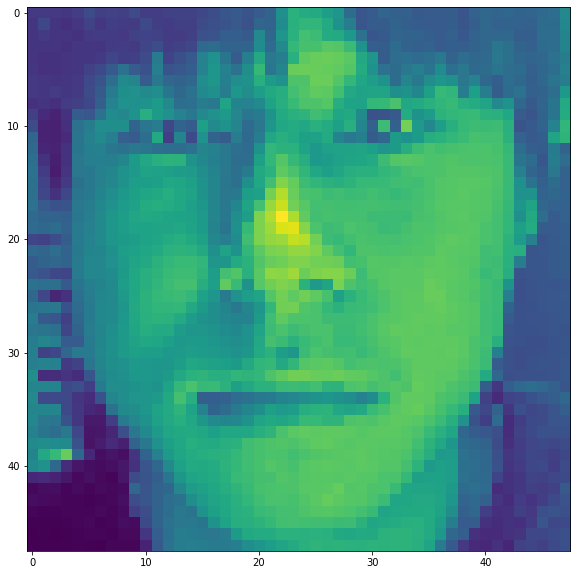

1/1 [==============================] - 0s 149ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 14ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
[['분노', 0.08356531709432602], ['두려움', 0.026008158922195435], ['행복함', 0.10763779282569885], ['슬픔', 0.6927708983421326], ['놀람', 0.08940780907869339], ['보통', 0.0006100242026150227]]


In [ ]:
classifier = face_exp()
print(classifier.predict('/content/' + name + '.jpg'))

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch
!pip install SpeechRecognition
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 104 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 30.0 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp38-cp38-linux_x86_64.whl size=619634 sha256=348ea36cda40cbd148f2d4935b0ae1bd1ada3ed8b8df09b81b8511241691c7e6
  Stored in directory: /root/.cache/pip/wheels/b6/93/9d/2237550c409eb3ed725d6302b7897ddd9a037b40cef66dcd9c
Successfully built gluonnlp
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 33.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-ymc2653n
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-ymc2653n
     |████████████████████████████████| 129 kB 35.8 MB/s 
     |████████████████████████████████| 54.7 MB 20 kB/s 
     |████████████████████████████████| 4.5 MB 39.2 MB/s 
     |████████████████████████████████| 1.2 MB 56.5 MB/s 
     |██████████████████████████████▎ | 834.1 MB 6.0 MB/s eta 0:00:08tcmalloc: large alloc 1147494400 bytes == 0x3add0000 @  0x7ffb0140b615 0x5d631c 0x51e4f1 0x51e67b 0x4f7585 0x49ca7c 0x4fdff5 0x49caa1 0x4fdff5 0x49ced5 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x4f60a9 0x55f926 0x5d7c18 0x5d9412 0x586636 0x5d813c 0x55f3fd 0x55e571 0x5d7cf1 0x49ced5 0x55e571 0x5d7cf1 0x49ec69 0x5d7c18 0x49ca7c 0x4fdff5 0x49ced5
     |████████████████████████████████| 881.9 MB 

In [ ]:
# torch
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook

#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#GPU 사용
device = torch.device("cuda:0")

#BERT 모델, Vocabulary 불러오기 필수
bertmodel, vocab = get_pytorch_kobert_model()


# KoBERT에 입력될 데이터셋 정리
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))  

# 모델 정의
class BERTClassifier(nn.Module): ## 클래스를 상속
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=5,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

# Setting parameters
max_len = 64
batch_size = 128
warmup_ratio = 0.1
num_epochs = 20
max_grad_norm = 1
log_interval = 100
learning_rate =  5e-5

## 학습 모델 로드
PATH = 'drive/MyDrive/colab/StoryFlower/bert/'
model = torch.load('/content/drive/Shareddrives/인지프/code/plusdata_ep30_batch_128_traintestdatamodified.h5')  # 전체 모델을 통째로 불러옴, 클래스 선언 필수
#model.load_state_dict(torch.load(PATH + 'model_state_dict_86.pt'))  # state_dict를 불러 온 후, 모델에 저장

#토큰화
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

def new_softmax(a) : 
    c = np.max(a) # 최댓값
    exp_a = np.exp(a-c) # 각각의 원소에 최댓값을 뺀 값에 exp를 취한다. (이를 통해 overflow 방지)
    sum_exp_a = np.sum(exp_a)
    y = (exp_a / sum_exp_a) * 100
    return np.round(y, 3)


# 예측 모델 설정
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    test_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(test_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)

        test_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()
            min_v = min(logits)
            total = 0
            probability = []
            logits = np.round(new_softmax(logits), 3).tolist()
            for logit in logits:
                print(logit)
                probability.append(np.round(logit, 3))

            if np.argmax(logits) == 0:  emotion = "불안"
            elif np.argmax(logits) == 1: emotion = "당황"
            elif np.argmax(logits) == 2: emotion = '분노'
            elif np.argmax(logits) == 3: emotion = '슬픔'
            elif np.argmax(logits) == 4: emotion = '기쁨'
            

            probability.append(emotion)
            print(probability)
    return probability

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]
using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
import speech_recognition as sr
r = sr.Recognizer()

# recognize_google() : Google Web Speech API
# recognize_google_cloud() : Google Cloud Speech API
# recognize_bing() : Microsoft Bing Speech API
# recognize_houndify() : SoundHound Houndify API
# recognize_ibm() : IBM Speech to Text API
# recognize_wit() : Wit.ai API
# recognize_sphinx() : CMU Sphinx (오프라인에서 동작 가능)


import librosa
sample_wav, rate = librosa.core.load('/content/drive/Shareddrives/인지프/reference/sample.wav')

korean_audio = sr.AudioFile('/content/drive/Shareddrives/인지프/reference/sample.wav')

with korean_audio as source:
    audio = r.record(source)
sen = r.recognize_google(audio_data=audio, language='ko-KR')

result2:
{   'alternative': [   {   'confidence': 0.81134665,
                           'transcript': '지금 너무 피곤하고 짜증나요'}],
    'final': True}


In [ ]:
predict(sen)
List = []
List.append(predict(sen))
nervous_nlp = float(List[0][0])
surprise_nlp = float(List[0][1])
angry_nlp = float(List[0][2])
sad_nlp = float(List[0][3])
happy_nlp = float(List[0][4])
output_nlp = List[0][5]

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


0.1420000046491623
0.050999999046325684
99.6709976196289
0.07100000232458115
0.06400000303983688
[0.142, 0.051, 99.671, 0.071, 0.064, '분노']
0.1420000046491623
0.050999999046325684
99.6709976196289
0.07100000232458115
0.06400000303983688
[0.142, 0.051, 99.671, 0.071, 0.064, '분노']


crop shape : (258, 258)


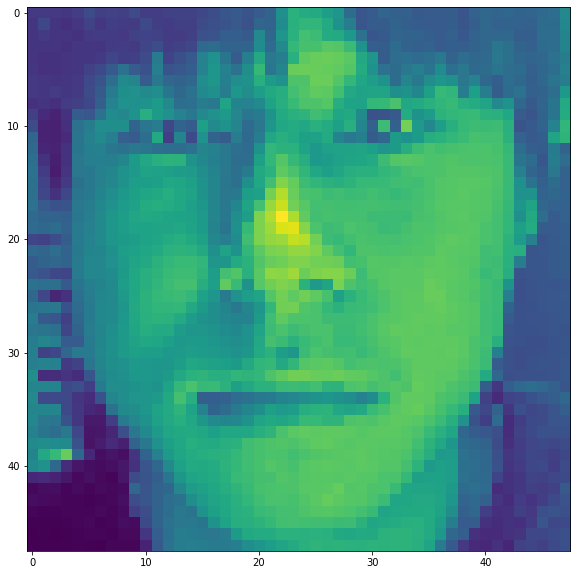

1/1 [==============================] - 0s 20ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 16ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
0.026008158922195435
crop shape : (258, 258)


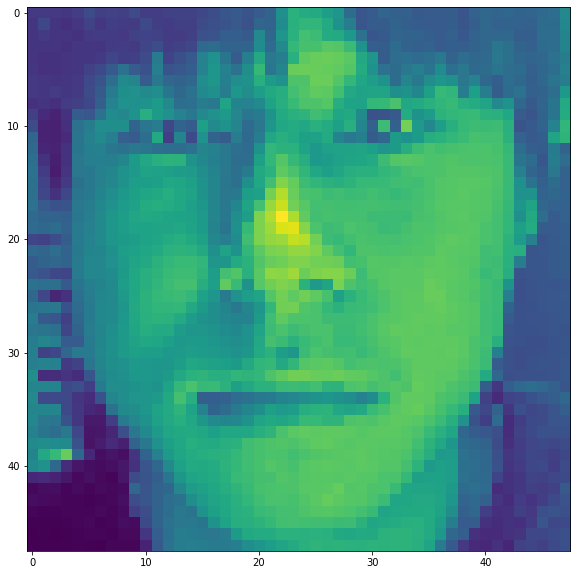

1/1 [==============================] - 0s 17ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 14ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
crop shape : (258, 258)


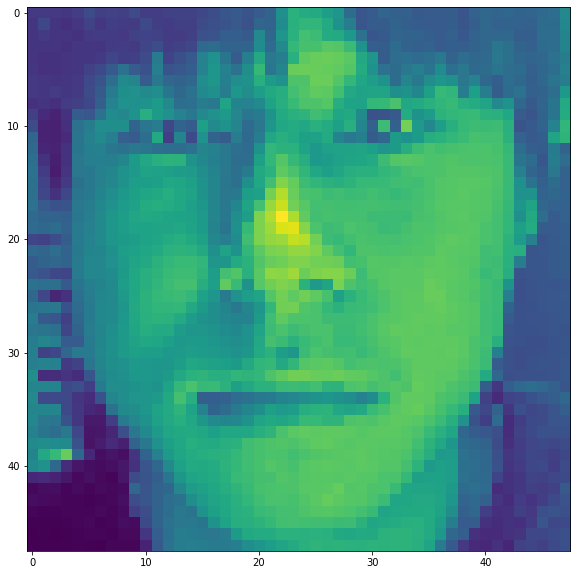

1/1 [==============================] - 0s 16ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 14ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
crop shape : (258, 258)


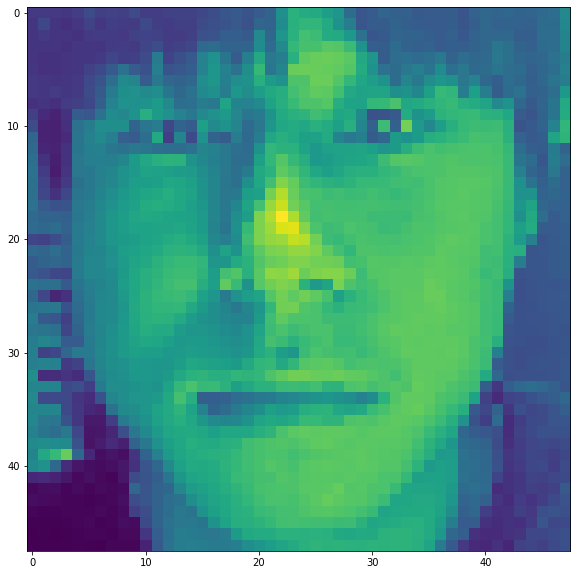

1/1 [==============================] - 0s 16ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 15ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
crop shape : (258, 258)


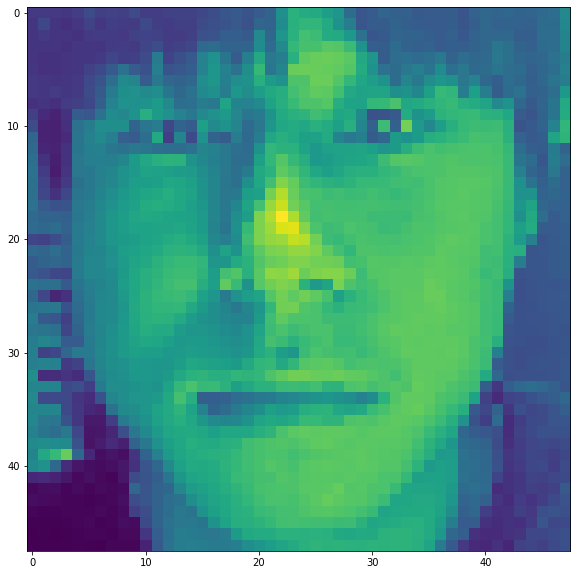

1/1 [==============================] - 0s 18ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 16ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
crop shape : (258, 258)


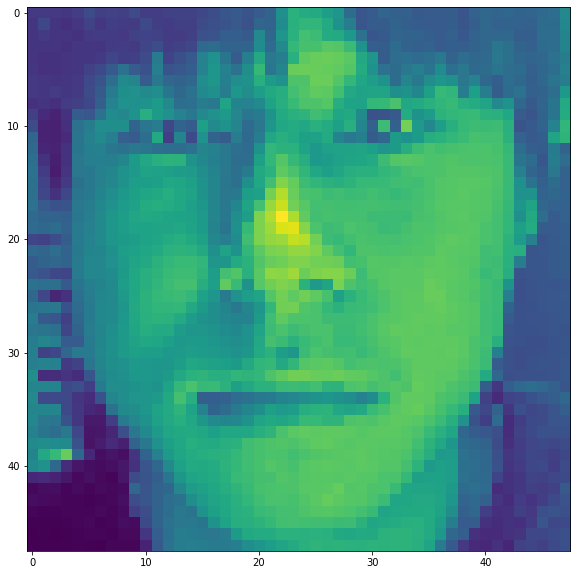

1/1 [==============================] - 0s 17ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 16ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]
crop shape : (258, 258)


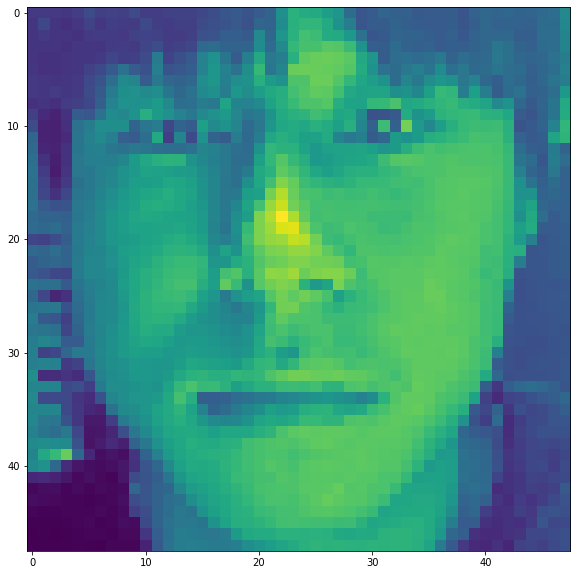

1/1 [==============================] - 0s 17ms/step
face expression output : 슬픔
1/1 [==============================] - 0s 15ms/step
Percentage Each expression : [[8.3565321e+00 2.6008158e+00 1.0763780e+01 6.9277092e+01 8.9407806e+00
  6.1002418e-02]]
[[0.08356531709432602, 0.026008158922195435, 0.10763779282569885, 0.6927708983421326, 0.08940780907869339, 0.0006100242026150227]]


In [ ]:
emotions = ('분노', '두려움', '행복함', '슬픔', '놀람', '보통')

nervous_cv = classifier.predict('/content/' + name + '.jpg')[1][1]
print(nervous_cv)

angry_cv = classifier.predict('/content/' + name + '.jpg')[0][1]
surprise_cv = classifier.predict('/content/' + name + '.jpg')[4][1]
sad_cv = classifier.predict('/content/' + name + '.jpg')[3][1]
happy_cv = classifier.predict('/content/' + name + '.jpg')[2][1]
neutral_cv = classifier.predict('/content/' + name + '.jpg')[5][1]
output_cv = emotions[np.argmax(classifier.predict('/content/' + name + '.jpg'), axis=-1)[0]]


In [ ]:
if output_cv == '보통':
  print('결과는 {}'.format(output_nlp))
else:
  nervous = nervous_nlp + nervous_cv
  angry = angry_nlp + angry_cv
  surprise = surprise_nlp + surprise_cv
  sad = sad_nlp + sad_cv
  happy = happy_nlp + happy_cv

  conclusion_list = []
  conclusion_list.append(nervous)
  conclusion_list.append(angry)
  conclusion_list.append(surprise)
  conclusion_list.append(sad)
  conclusion_list.append(happy)
  if np.max(conclusion_list) == nervous:
    print('결과는 걱정')
  elif np.max(conclusion_list) == angry:
    print('결과는 분노')
  elif np.max(conclusion_list) == surprise:
    print('결과는 당황')
  elif np.max(conclusion_list) == sad:
    print('결과는 슬픔')
  elif np.max(conclusion_list) == happy:
    print('결과는 행복')

결과는 분노
